In [14]:
import numpy as np
import pandas as pd
import random
import time
import datetime
import warnings
warnings.filterwarnings('ignore')


In [15]:
# 로우데이터

In [28]:
#고객 데이터
np.random.seed(1)
df_c = pd.DataFrame(columns=['cusno','gender','age','region'])
df_c['cusno'] = random.sample(range(1, 1001), 1000)
df_c['gender'] = np.random.randint(0,2, 1000)
df_c['age'] = np.random.randint(10,81, 1000)
df_c['region'] = np.random.randint(1,11, 1000)

In [29]:
# 상품 데이터
np.random.seed(1)
df_d = pd.DataFrame(columns=['id','cusno','product','price','quantity','amount'])
df_d['id'] = random.sample(range(1,10001), 10000)
df_d['cusno'] = np.random.randint(1, 1001, 10000)
df_d['product'] = np.random.choice((10, 20, 30), 10000)
df_d['price'] = np.random.uniform(1000,50001, 10000)
df_d['quantity'] = np.random.randint(1,101, 10000)
df_d['amount'] = df_d.price * df_d.quantity


In [30]:
# 저가품의 가격과 고가품의 가격 매치
bin_d = np.linspace(df_d.price.min(), df_d.price.max(), 4)
bin_n = ['30','20','10']
df_d['product'] = pd.cut(x=df_d.price,  
                           bins=bin_d,  
                           labels=bin_n, 
                           include_lowest=True)  


In [31]:
df = df_c.merge(df_d, on='cusno', how='outer')
df.head()

,cusno,gender,age,region,id,product,price,quantity,amount
0,680,1,14,8,351,20,19232.557094,77,1.480907e+06
1,680,1,14,8,9411,20,23659.866210,33,7.807756e+05
2,680,1,14,8,9406,10,42863.015039,92,3.943397e+06
3,680,1,14,8,7024,30,10433.443348,62,6.468735e+05
4,680,1,14,8,7957,30,7115.205100,85,6.047924e+05


In [32]:
#거래일자
np.random.seed(1)
df['date'] = np.random.choice(pd.date_range(start='2020-01-01', end='2021-12-31'), 10000)
df.date = pd.to_datetime(df.date)

In [33]:
#거래 시간
np.random.seed(1)
df['time'] = np.random.randint(10,20 , 10000)

In [34]:
#거래 시간에 따라 거래번호 다시 부여
df = df.sort_values(['date','time'])
df['id'] = range(1,10001)

In [35]:
# #cusno 인덱스화
# df.set_index('cusno',inplace=True)

In [36]:
#요일
df['week']=df['date'].apply(lambda x: x.weekday())  #date별 요일을 숫자로 나타냄
df['week']=df['week'].replace(list(range(7)),['월','화','수','목','금','토','일'])
df

,cusno,gender,age,region,id,product,price,quantity,amount,date,time,week
664,937,0,74,3,1,10,38383.863255,32,1.228284e+06,2020-01-01,10,수
4803,590,1,62,5,2,30,14157.806697,63,8.919418e+05,2020-01-01,10,수
4753,335,0,43,2,3,30,4881.597570,40,1.952639e+05,2020-01-01,11,수
7892,61,0,21,7,4,20,24785.461810,6,1.487128e+05,2020-01-01,11,수
2566,168,1,74,4,5,20,28659.316739,42,1.203691e+06,2020-01-01,12,수
...,...,...,...,...,...,...,...,...,...,...,...,...
7068,921,1,67,2,9996,30,6635.108947,27,1.791479e+05,2021-12-31,15,금
6633,314,0,61,2,9997,30,4348.802194,12,5.218563e+04,2021-12-31,16,금
6296,420,1,15,5,9998,30,1314.000969,75,9.855007e+04,2021-12-31,17,금
3174,526,1,28,2,9999,30,4707.080108,90,4.236372e+05,2021-12-31,18,금


In [37]:
df['year'] = df.date.dt.year

In [38]:
# 나이대
def agec(x):
    if x < 30:
        return 20
    elif x < 40:
        return 30
    elif x < 50:
        return 40
    elif x < 60:
        return 50
    else:
        return 60
        
df['agec'] = df.age.apply(agec)

In [39]:
df

,cusno,gender,age,region,id,product,price,quantity,amount,date,time,week,year,agec
664,937,0,74,3,1,10,38383.863255,32,1.228284e+06,2020-01-01,10,수,2020,60
4803,590,1,62,5,2,30,14157.806697,63,8.919418e+05,2020-01-01,10,수,2020,60
4753,335,0,43,2,3,30,4881.597570,40,1.952639e+05,2020-01-01,11,수,2020,40
7892,61,0,21,7,4,20,24785.461810,6,1.487128e+05,2020-01-01,11,수,2020,20
2566,168,1,74,4,5,20,28659.316739,42,1.203691e+06,2020-01-01,12,수,2020,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,921,1,67,2,9996,30,6635.108947,27,1.791479e+05,2021-12-31,15,금,2021,60
6633,314,0,61,2,9997,30,4348.802194,12,5.218563e+04,2021-12-31,16,금,2021,60
6296,420,1,15,5,9998,30,1314.000969,75,9.855007e+04,2021-12-31,17,금,2021,20
3174,526,1,28,2,9999,30,4707.080108,90,4.236372e+05,2021-12-31,18,금,2021,20


In [ ]:
로우데이터를 먼저 만들고 구매감소고객을 찾고 이유, 구매감소에 관련된 컬럼을 조작 독립변수

label로 학습 구매 증가 감소 도출할 수 있음

고객별 인사이트 행동패턴, 저가품, 일회용품 감소, 고가품 증가 보복소비?

남성 여성, 여성의 구매가 줄었음

In [68]:
#나이별 가중치
#60대를 기준으로 젊은 고객층의 구매액 증가
'20대':8/6,
'30대':18/6,
'40대':18/6,
'50대':10/6,
'60대이상':6/6


SyntaxError: invalid syntax (166567611.py, line 3)

In [40]:
df.loc[df['agec'] == 20, 'price'] = df.price *(8/6)
df.loc[df['agec'] == 30, 'price'] = df.price *(18/6)
df.loc[df['agec'] == 40, 'price'] = df.price *(18/6)
df.loc[df['agec'] == 50, 'price'] = df.price *(10/6)
df.loc[df['agec'] == 60, 'price'] = df.price *(6/6)
df['amount'] = df.price * df.quantity

In [41]:
df

,cusno,gender,age,region,id,product,price,quantity,amount,date,time,week,year,agec
664,937,0,74,3,1,10,38383.863255,32,1.228284e+06,2020-01-01,10,수,2020,60
4803,590,1,62,5,2,30,14157.806697,63,8.919418e+05,2020-01-01,10,수,2020,60
4753,335,0,43,2,3,30,14644.792710,40,5.857917e+05,2020-01-01,11,수,2020,40
7892,61,0,21,7,4,20,33047.282414,6,1.982837e+05,2020-01-01,11,수,2020,20
2566,168,1,74,4,5,20,28659.316739,42,1.203691e+06,2020-01-01,12,수,2020,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,921,1,67,2,9996,30,6635.108947,27,1.791479e+05,2021-12-31,15,금,2021,60
6633,314,0,61,2,9997,30,4348.802194,12,5.218563e+04,2021-12-31,16,금,2021,60
6296,420,1,15,5,9998,30,1752.001292,75,1.314001e+05,2021-12-31,17,금,2021,20
3174,526,1,28,2,9999,30,6276.106811,90,5.648496e+05,2021-12-31,18,금,2021,20


In [42]:
# 저가품 감소, 고가품 증가
len(df.loc[(df['product']=='30')&(df['year']==2020), 'product'])
prd=df.loc[(df['product']=='30')&(df['year']==2020)].index.tolist()
prd=random.sample(prd, 500)
df.loc[prd,'product']='10'
len(df.loc[(df['product']=='30')&(df['year']==2020), 'product'])

1142

In [43]:
len(df.loc[(df['product']=='30')&(df['year']==2021), 'product'])
prd=df.loc[(df['product']=='30')&(df['year']==2021)].index.tolist()
prd=random.sample(prd, 500)
df.loc[prd,'product']='10'
len(df.loc[(df['product']=='30')&(df['year']==2021), 'product'])

1110

In [44]:
# 여성 구매 감소
len(df.loc[(df['gender']==1)&(df['year']==2021), 'gender'])
pu = df.loc[(df['gender']==1)&(df['year']==2021)].index.tolist()
pu = random.sample(pu, 500)
df.loc[pu,'gender']= 0
len(df.loc[(df['gender']==1)&(df['year']==2021), 'gender'])


1890

In [45]:
df

,cusno,gender,age,region,id,product,price,quantity,amount,date,time,week,year,agec
664,937,0,74,3,1,10,38383.863255,32,1.228284e+06,2020-01-01,10,수,2020,60
4803,590,1,62,5,2,30,14157.806697,63,8.919418e+05,2020-01-01,10,수,2020,60
4753,335,0,43,2,3,30,14644.792710,40,5.857917e+05,2020-01-01,11,수,2020,40
7892,61,0,21,7,4,20,33047.282414,6,1.982837e+05,2020-01-01,11,수,2020,20
2566,168,1,74,4,5,20,28659.316739,42,1.203691e+06,2020-01-01,12,수,2020,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,921,0,67,2,9996,30,6635.108947,27,1.791479e+05,2021-12-31,15,금,2021,60
6633,314,0,61,2,9997,30,4348.802194,12,5.218563e+04,2021-12-31,16,금,2021,60
6296,420,1,15,5,9998,30,1752.001292,75,1.314001e+05,2021-12-31,17,금,2021,20
3174,526,1,28,2,9999,10,6276.106811,90,5.648496e+05,2021-12-31,18,금,2021,20


In [21]:
# 분석

In [46]:
grouped_c = df.groupby(['cusno'])
list(grouped_c)


[(1,
       cusno  gender  age  region    id product         price  quantity  \
  490      1       0   11       6   550      10  63510.544260        18   
  488      1       0   11       6   599      10  47070.514381         9   
  493      1       0   11       6  1689      10   5846.385445        82   
  486      1       0   11       6  2258      10  57853.118632        13   
  487      1       0   11       6  2259      20  43625.428871        66   
  491      1       0   11       6  5153      30   2106.034296        87   
  492      1       0   11       6  9419      10  64654.939281        83   
  494      1       0   11       6  9876      10  56244.551610        96   
  489      1       0   11       6  9882      20  38372.171512        91   
  
             amount       date  time week  year  agec  
  490  1.143190e+06 2020-02-08    14    토  2020    20  
  488  4.236346e+05 2020-02-12    12    수  2020    20  
  493  4.794036e+05 2020-05-02    13    토  2020    20  
  486  7.520905e+0

In [47]:
aver = grouped_c.mean()
aver

,gender,age,region,id,price,quantity,amount,time,year,agec
cusno,,,,,,,,,,
1,0.000000,11.0,6.0,4631.666667,42142.632032,60.555556,2.235392e+06,13.888889,2020.444444,20.0
2,1.000000,26.0,1.0,4602.272727,38110.570756,63.090909,2.302590e+06,13.363636,2020.454545,20.0
3,0.000000,33.0,9.0,5088.750000,80710.306887,40.916667,3.334760e+06,15.750000,2020.583333,30.0
4,0.000000,28.0,7.0,4143.727273,28628.855744,48.818182,1.413033e+06,15.090909,2020.363636,20.0
5,0.000000,53.0,2.0,4668.571429,51654.561553,68.285714,3.358603e+06,14.428571,2020.285714,50.0
...,...,...,...,...,...,...,...,...,...,...
996,0.000000,10.0,2.0,4172.900000,26048.948370,49.200000,1.005597e+06,16.100000,2020.400000,20.0
997,0.000000,41.0,6.0,5318.888889,72390.961173,55.888889,3.683583e+06,14.000000,2020.555556,40.0
998,0.000000,31.0,1.0,2575.571429,79121.686234,63.857143,3.930094e+06,14.857143,2020.142857,30.0


In [48]:
import matplotlib.pyplot as plt
from numpy.random import randn


고객번호를 입력하세요9


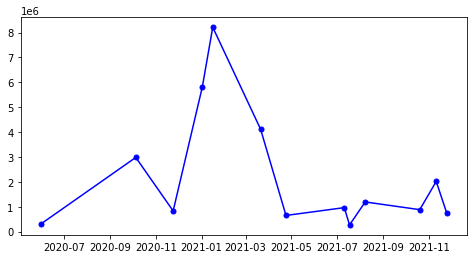

In [50]:
# 고객 한명의 소비 변화 추이
# 고객 소비금액
cusn = int(input('고객번호를 입력하세요'))
x = df.loc[(df['cusno']==cusn)&(df['amount']), 'date']
y = df.loc[(df['cusno']==cusn)&(df['amount']), 'amount']
plt.figure(figsize=(8,4))
plt.plot(x,y, color='blue', marker='o', markersize=5)

#plt.plot(df.loc[(df['cusno']==10001)&(df['amount']), 'amount'], linestyle='dashed', color='k', marker='o')

In [51]:
# 고객별 2020년도와 2021년도의 소비 총합
pdf = pd.pivot_table(df, index='cusno', columns='year', values='amount', aggfunc=np.sum) # aggfunc 나타내는 방법:평균
pdf.head()

year,2020,2021
cusno,,
1,5.677597e+06,1.444093e+07
2,1.521527e+07,1.011322e+07
3,1.428847e+07,2.572864e+07
4,6.851147e+06,8.692219e+06
5,1.285957e+07,1.065066e+07


In [52]:
# 고객별 2020년 대비 2021년의 구매 총액 변화 
pdf['dff'] = pdf.iloc[:,1]-pdf.iloc[:,0]
pdf.head()

year,2020,2021,dff
cusno,,,
1,5.677597e+06,1.444093e+07,8.763333e+06
2,1.521527e+07,1.011322e+07,-5.102043e+06
3,1.428847e+07,2.572864e+07,1.144017e+07
4,6.851147e+06,8.692219e+06,1.841072e+06
5,1.285957e+07,1.065066e+07,-2.208913e+06


<BarContainer object of 10000 artists>

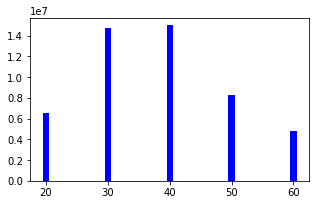

In [53]:
# 나이대 별 구매 총액 비교
df1= df.copy()
y = df1.amount
x = df1.agec
plt.figure(figsize=(5,3))
plt.bar(x,y, width=1, color='blue')

30, 40대의 높은 소비금액과 60대의 낮은 소비금액을 보여줍니다.

In [106]:
df2 = pd.DataFrame(df[['agec','product']] , index=df['agec'], columns=df['product'])

df.plot.bar()

<AxesSubplot:>

ValueError: Date ordinal 15426631.022076119 converts to 44206-09-07T00:31:47.376640 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

In [54]:
# 나이대 별 구매 물품 종류
y = df.amount
x = df.agec
plt.figure(figsize=(5,3))
df.plot.bar()

<AxesSubplot:>

<Figure size 360x216 with 0 Axes>

ValueError: Date ordinal 15742043.59567517 converts to 45070-04-02T14:17:46.334720 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

<BarContainer object of 2 artists>

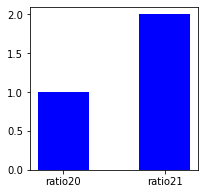

In [104]:
# 2020대비 2021 의 고가품 구매 비율
df2 = df[['product', 'year']]
df2['product'] = df2['product'].astype('int')

ratio20 = len(df2.loc[(df2['year']==2020)&(df2['product']==10),:])/len(df2.loc[(df2['year']==2020)&(df2['product']==30),:])
ratio21 = len(df2.loc[(df2['year']==2021)&(df2['product']==10),:])/len(df2.loc[(df2['year']==2021)&(df2['product']==30),:])
li = ['ratio20','ratio21']
y = range(1,3)
x = li
plt.figure(figsize=(3,3))
plt.bar(x,y, width=0.5, color='blue')

20년대 대비 21년의 고가품 구매비율이 2배 가량 증가하였습니다.

In [ ]:
#남성의 고가품 구매 총액 증감


<BarContainer object of 2 artists>

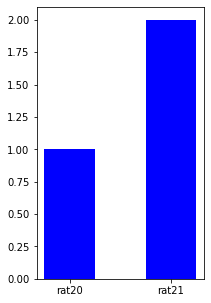

In [105]:
# 2020, 2021 고객의 성비
f20 = len(df.loc[(df['gender']==1)&(df['year']==2020), :])
f21 = len(df.loc[(df['gender']==1)&(df['year']==2021), :])
m20 = len(df.loc[(df['gender']==0)&(df['year']==2020), :])
m21 = len(df.loc[(df['gender']==0)&(df['year']==2021), :])

rat20 = f20/m20
rat21 = f21/m21
li = ['rat20','rat21']
y = range(1,3)
x = li
plt.figure(figsize=(3,5))
plt.bar(x,y, width=0.5, color='blue')

20년 대비 21년의 남성 고객의 비율이 증가하였습니다.